# Assignment 2
## Due April 12th

1. Read HW2_Data.xlsx file uploaded with the assignment. This file contains some information about patients visiting a clinic.
2.  Examine if there are any missing values in the data and replace them with the mean of the corresponding column. 
3.  Find correlation between columns and report the two columns that have maximum correlation
4.  Perform PCA and using the explained variance investigate if we can reduce the dimension of the data set. Plot the explained variance as described in the lecture slides 9. 

# Part 1
Read the file and display the first few entries.

In [45]:
import numpy as np
import pandas as pd
import  matplotlib.pyplot as plt

df1 = pd.read_excel('/Users/james/Documents/SBU/ISE 390 Data Science/data/HW2_data.xlsx', sheet_name="Data")
df1.head(10)

,PATIENT_CONDITION,INSURANCE_TYPE,AGE,SEX,VISIT_DATE,PT_START_TIME,PT_END_TIME,PROVIDER_NAME
0,Uncommon Cold,BlueSword/BlueDiamond,31,M,2005-01-03,08:07:19,08:22:23,L. Jedermann
1,TV Personality Disorder,BlueSword/BlueDiamond,42,M,2005-01-03,15:09:34,15:41:32,E. Medelsvensson
2,Saturday Night Fever,ConglomoHealth,22,M,2005-01-03,13:16:22,13:32:39,K. van der Merwe
3,Saturday Night Fever,Medifix,24,M,2005-01-03,12:37:24,12:57:39,K. van der Merwe
4,Uncommon Cold,ConglomoHealth,41,F,2005-01-03,10:58:56,11:15:41,M. Dupont
5,Uncommon Cold,Self Insured,32,M,2005-01-03,10:00:19,10:16:16,L. Jedermann
6,Saturday Night Fever,Self Insured,22,M,2005-01-03,09:11:53,09:39:05,J. Smith
7,TV Personality Disorder,Medifix,42,M,2005-01-03,08:42:55,09:17:12,E. Medelsvensson
8,TV Personality Disorder,Medifix,48,F,2005-01-03,08:18:47,08:53:23,I. Petrov
9,TV Personality Disorder,BlueSword/BlueDiamond,69,F,2005-01-03,11:34:38,12:07:07,I. Petrov


# Part 2
There are no missing values in any of the columns.

In [32]:
df1.isnull().sum()

PATIENT_CONDITION    0
INSURANCE_TYPE       0
AGE                  0
SEX                  0
VISIT_DATE           0
PT_START_TIME        0
PT_END_TIME          0
PROVIDER_NAME        0
dtype: int64

# Converting data
Read the data into a second dataframe. Converted all of the categorical data, dates, and times into numbers so they can be analyzed.

In [91]:
df2 = pd.read_excel('/Users/james/Documents/SBU/ISE 390 Data Science/data/HW2_data.xlsx', sheet_name="Data")

visitday = df2['PT_END_TIME'].map(lambda x: datetime.datetime.strptime(str(x), '%H:%M:%S'))
df2['PT_END_TIME'] = [3600*int(i.hour)+60*int(i.minute)+int(i.second) for i in visitday ]

visitday = df2['PT_START_TIME'].map(lambda x: datetime.datetime.strptime(str(x), '%H:%M:%S'))
df2['PT_START_TIME'] = [3600*int(i.hour)+60*int(i.minute)+int(i.second) for i in visitday ]

df2['INSURANCE_TYPE'] = df2['INSURANCE_TYPE'].astype('category')
df2['INSURANCE_TYPE'] = df2['INSURANCE_TYPE'].cat.codes

df2['SEX'] = df2['SEX'].astype('category')
df2['SEX'] = df2['SEX'].cat.codes

df2['PATIENT_CONDITION'] = df2['PATIENT_CONDITION'].astype('category')
df2['PATIENT_CONDITION'] = df2['PATIENT_CONDITION'].cat.codes

df2['VISIT_DATE'] = df2['VISIT_DATE'].dt.strftime("%Y%m%d").astype(int)

df2['PROVIDER_NAME'] = df2['PROVIDER_NAME'].astype('category')
df2['PROVIDER_NAME'] = df2['PROVIDER_NAME'].cat.codes

df2.head()

,PATIENT_CONDITION,INSURANCE_TYPE,AGE,SEX,VISIT_DATE,PT_START_TIME,PT_END_TIME,PROVIDER_NAME
0,2,0,31,1,20050103,29239,30143,5
1,1,0,42,1,20050103,54574,56492,1
2,0,1,22,1,20050103,47782,48759,4
3,0,2,24,1,20050103,45444,46659,4
4,2,1,41,0,20050103,39536,40541,6


# Part 3
Maximum correlation is between start time and end time: 0.998
This is to be expected. A more relevant correlation that is the second highest is between age and patient condition: 0.467

In [92]:
df2.corr()

,PATIENT_CONDITION,INSURANCE_TYPE,AGE,SEX,VISIT_DATE,PT_START_TIME,PT_END_TIME,PROVIDER_NAME
PATIENT_CONDITION,1.000000,-0.010215,0.467372,-0.149414,-0.064374,0.019197,0.006115,-0.229978
INSURANCE_TYPE,-0.010215,1.000000,0.006296,-0.002761,0.005683,-0.004896,-0.004807,0.022921
AGE,0.467372,0.006296,1.000000,-0.237026,-0.104046,0.001606,0.023924,-0.074262
SEX,-0.149414,-0.002761,-0.237026,1.000000,0.018155,0.020148,0.012270,0.085486
VISIT_DATE,-0.064374,0.005683,-0.104046,0.018155,1.000000,0.040741,0.036631,0.015162
PT_START_TIME,0.019197,-0.004896,0.001606,0.020148,0.040741,1.000000,0.998685,0.022282
PT_END_TIME,0.006115,-0.004807,0.023924,0.012270,0.036631,0.998685,1.000000,0.019165
PROVIDER_NAME,-0.229978,0.022921,-0.074262,0.085486,0.015162,0.022282,0.019165,1.000000


# Part 4
Explained Variance. We can reduce the data set to only one dimension and still account for almost all (99.9%) of the total variance. With a second principal component, it is 100%.

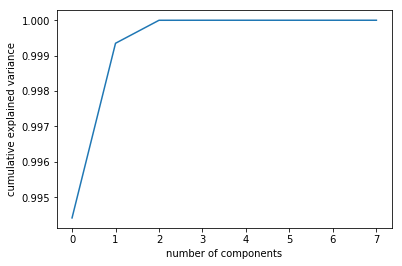

In [95]:
from sklearn.decomposition import PCA
pca = PCA(n_components=8)
pca.fit(df2)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');
plt.show()